In [128]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data = pd.read_csv('../data/synthetic_coffee_health_10000.csv')
data.drop(columns=['ID','Country'], inplace=True)
data.head()

,Age,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [130]:
data.describe()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [146]:
data.info

<bound method DataFrame.info of       Age  Gender  Coffee_Intake  Caffeine_mg  Sleep_Hours Sleep_Quality  \
0      40    Male            3.5        328.1          7.5          Good   
1      33    Male            1.0         94.1          6.2          Good   
2      42    Male            5.3        503.7          5.9          Fair   
3      53    Male            2.6        249.2          7.3          Good   
4      32  Female            3.1        298.0          5.3          Fair   
...   ...     ...            ...          ...          ...           ...   
9995   50  Female            2.1        199.8          6.0          Fair   
9996   18  Female            3.4        319.2          5.8          Fair   
9997   26    Male            1.6        153.4          7.1          Good   
9998   40  Female            3.4        327.1          7.0          Good   
9999   42  Female            2.9        277.5          6.4          Good   

       BMI  Heart_Rate Stress_Level  Physical_Activity_

In [147]:
data.shape

(10000, 14)

In [131]:
data.columns 

Index(['Age', 'Gender', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
       'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [132]:
data.isna().sum()

Age                           0
Gender                        0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [133]:
data['Health_Issues'].value_counts()

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

In [134]:
num_data = data.select_dtypes(include=['int64', 'float64'])


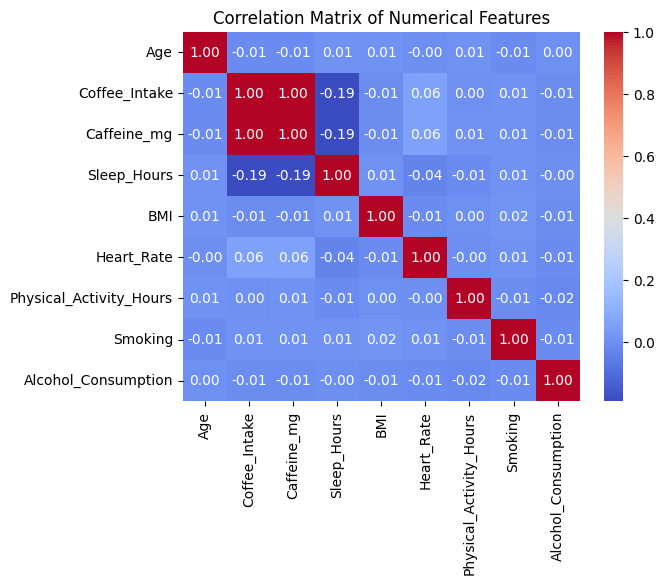

<Figure size 640x480 with 0 Axes>

In [135]:
corr = num_data.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
plt.savefig('../images/correlation_matrix.png')

In [136]:
data.columns

Index(['Age', 'Gender', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
       'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

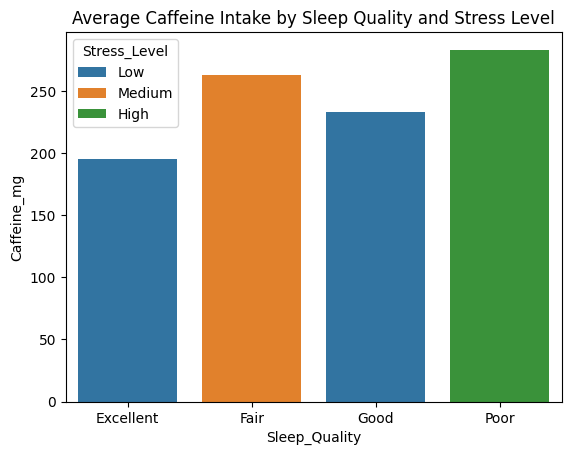

<Figure size 640x480 with 0 Axes>

In [137]:
sns.barplot(
    x='Sleep_Quality',
    y='Caffeine_mg',
    hue='Stress_Level',
    data=sq_sl_per_caffeine_mg
)
plt.title("Average Caffeine Intake by Sleep Quality and Stress Level")
plt.show()
plt.savefig('../images/Average Caffeine Intake by Sleep Quality and Stress Level.png')


In [138]:
data['Health_Issues'].fillna(data['Health_Issues'].mode()[0], inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_144\1041764836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Health_Issues'].fillna(data['Health_Issues'].mode()[0], inplace=True)


In [139]:
health_per_coffee = data.groupby('Health_Issues')['Coffee_Intake'].mean()
health_per_coffee

Health_Issues
Mild        2.494979
Moderate    2.803024
Severe      2.488235
Name: Coffee_Intake, dtype: float64

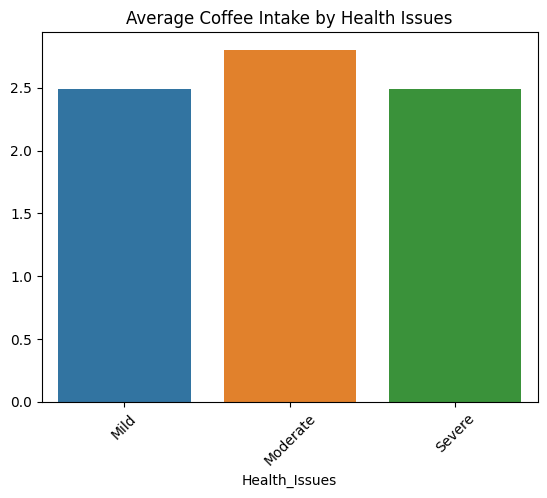

In [140]:
sns.barplot(x=health_per_coffee.index, y=health_per_coffee.values , hue=health_per_coffee.index)
plt.xticks(rotation=45) 
plt.title("Average Coffee Intake by Health Issues")
plt.show()

In [141]:
data.head()

,Age,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Mild,Other,0,0
1,33,Male,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Mild,Service,0,0
2,42,Male,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


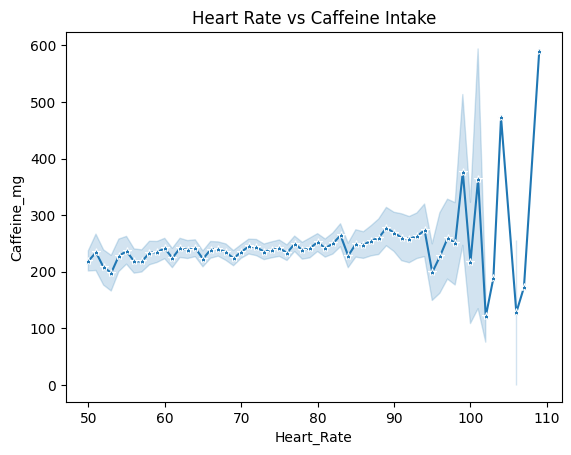

<Figure size 640x480 with 0 Axes>

In [142]:
sns.lineplot(x='Heart_Rate', y='Caffeine_mg', data=data, marker='*')
plt.title("Heart Rate vs Caffeine Intake")
plt.show()
plt.savefig('../images/Heart Rate vs Caffeine Intake.png')

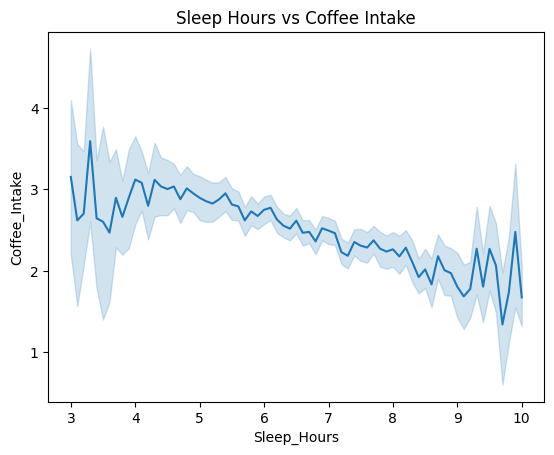

<Figure size 640x480 with 0 Axes>

In [143]:
sns.lineplot(x='Sleep_Hours', y='Coffee_Intake', data=data)
plt.title("Sleep Hours vs Coffee Intake")
plt.show()
plt.savefig('../images/Sleep Hours vs Coffee Intake.png')

In [144]:
data.to_csv('../data/data.csv', index=False)